In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('E:\cobaja\CSA-Data.csv')

# The distressing lack of awareness regarding sexual abuse in Indonesia.

**According to records from the Ministry of Women's Empowerment and Child Protection (KemenPPPA), cases of sexual violence against children surged to 9,588 in 2022, marking a substantial increase from the previous year's count of 4,162 cases. This alarming rise in reported incidents highlights a critical concern regarding the safety and well-being of children in the country.**

[CNN Indonesia](https://www.cnnindonesia.com/nasional/20230127173509-20-905780/kemenpppa-ri-darurat-kekerasan-seksual-anak-9588-kasus-selama-2022)

A machine learning model could aid parents in assessing their children's comprehension of sexual abuse. By analyzing children's habits and their surroundings, this model could provide tests or indicators to parents regarding the extent of their children's understanding of this issue. This could serve as a crucial step in initiating crucial conversations and providing better understanding to children about this sensitive topic.

In [4]:
df.head()

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 9 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   "Children are safe among family members such as grandparents, uncles, aunts, cousins"                   3002 non-null   object
 1   "Children are mainly abused by strangers in our society"                                                3002 non-null   object
 2   Male children dont need sexual abuse prevention knowledge                                               3002 non-null   object
 3   "Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"  3002 non-null   object
 4   Do you know what child grooming is?                                                              

In [6]:
df.isnull().sum()

"Children are safe among family members such as grandparents, uncles, aunts, cousins"                     0
"Children are mainly abused by strangers in our society"                                                  0
Male children dont need sexual abuse prevention knowledge                                                 0
"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"    0
Do you know what child grooming is?                                                                       0
Do you know what signs to look for to identify if your child has been abused?                             0
Do you think children need post abuse counseling for recovering?                                          0
Do you think you should take legal action against the abuser of your child?                               0
Knowledge Level                                                                                           0
dtype: int64

In [7]:
df.duplicated().sum()

2755

In [8]:
df = df.drop_duplicates()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# DataFrame Anda
# Misalkan df adalah nama DataFrame Anda

for column in df.columns:
    if df[column].dtype == 'object':  # Memeriksa tipe data kolom (jika string)
        df[column] = label_encoder.fit_transform(df[column])

# Menampilkan DataFrame setelah proses encoding
df


,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,1,1,0
2,1,1,1,1,0,0,1,1,0
4,0,1,1,1,1,1,1,1,1
5,0,1,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
2310,0,1,0,1,0,1,0,0,0
2313,0,0,0,1,0,1,0,0,0
2358,0,0,1,0,1,0,0,1,0
2855,1,0,0,0,1,1,0,1,0


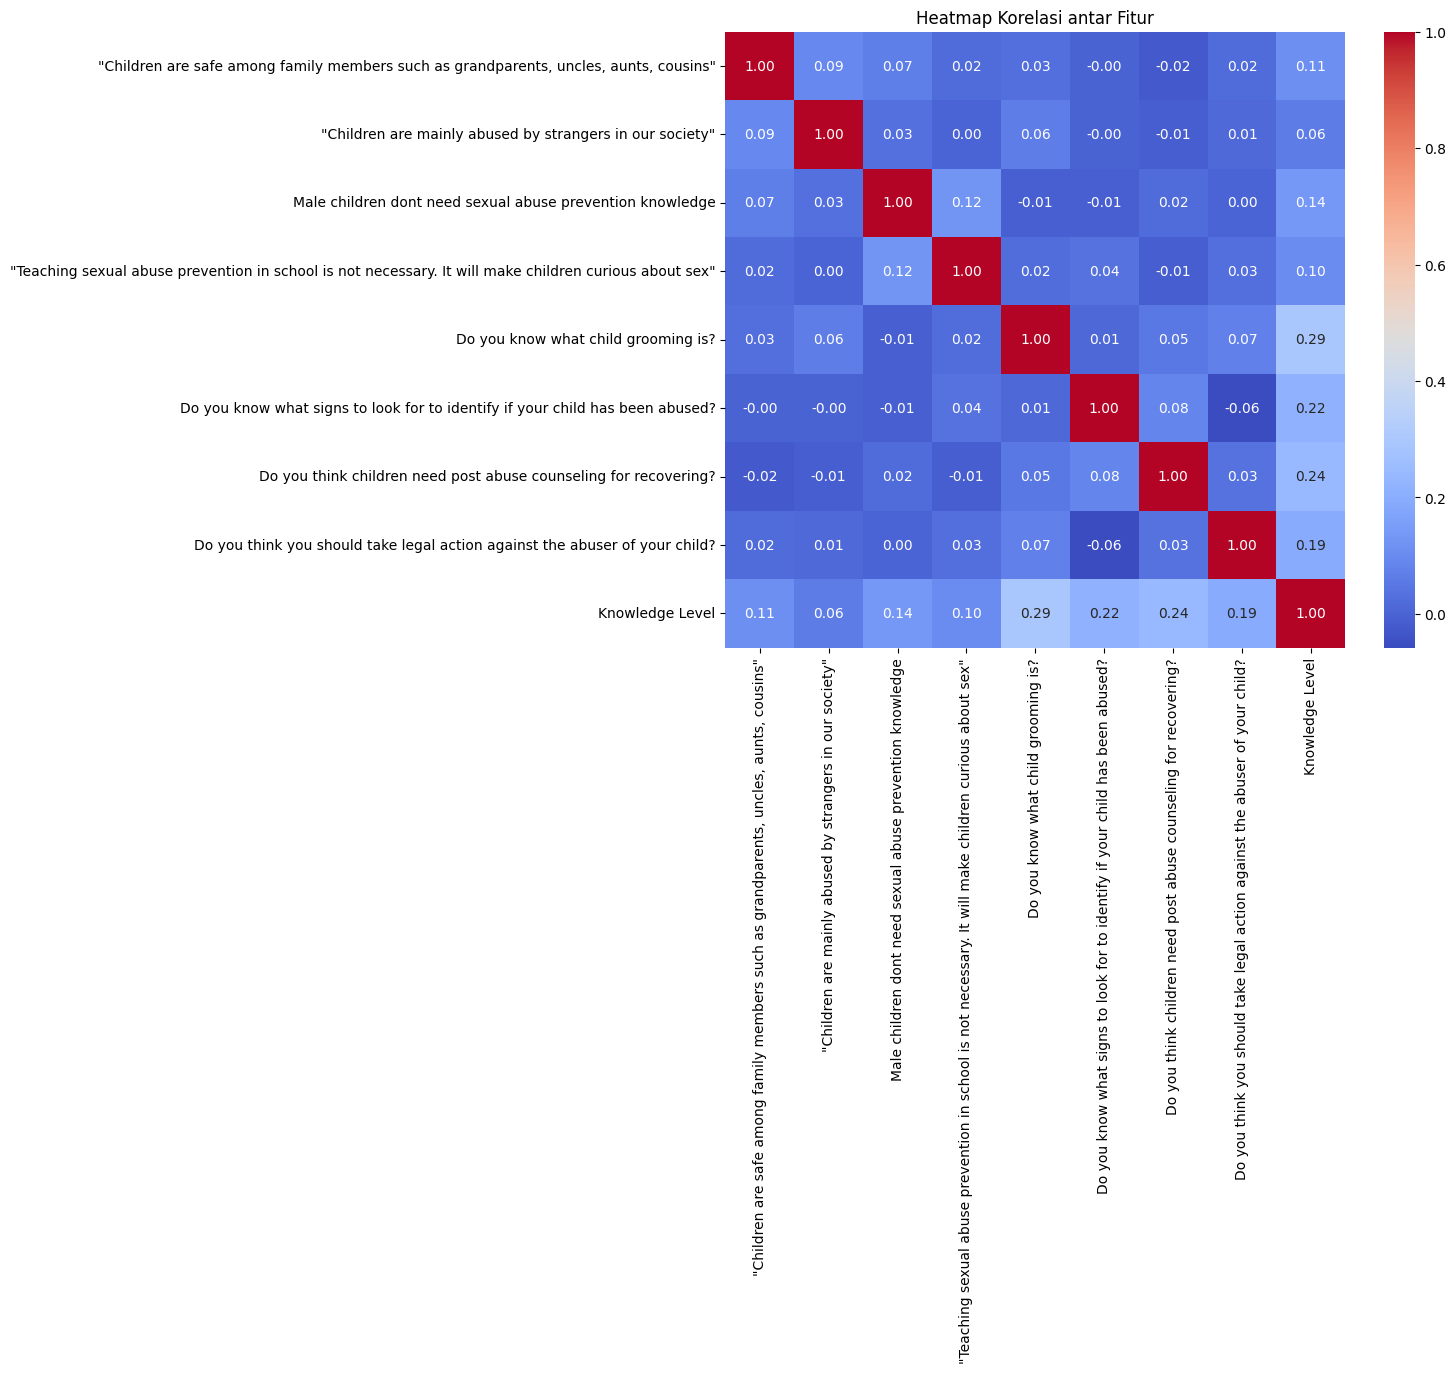

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan metode corr() pada DataFrame untuk mencari korelasi
correlation = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Fitur')
plt.show()


In [11]:
value_counts = df['Knowledge Level'].value_counts()

# Menampilkan hasil value counts
print(value_counts)

0    181
1     66
Name: Knowledge Level, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

# Misalkan 'data' adalah DataFrame yang berisi kolom-kolom di atas, kecuali kolom 'Knowledge Level'
# Misalkan 'target' adalah kolom 'Knowledge Level' yang akan diprediksi

# Memisahkan fitur dan label
features = df.drop('Knowledge Level', axis=1)
target = df['Knowledge Level']

# Membagi data menjadi set pelatihan (train) dan pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan pengujian
print("Jumlah data dalam set pelatihan:", X_train.shape[0])
print("Jumlah data dalam set pengujian:", X_test.shape[0])


Jumlah data dalam set pelatihan: 197
Jumlah data dalam set pengujian: 50


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Akurasi model Random Forest:", rf_accuracy)
# F1-score untuk model Random Forest
f1_rf = f1_score(y_test, rf_predictions)
print("F1-score model Random Forest:", f1_rf)

# Model Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Akurasi model SVM:", svm_accuracy)
# F1-score untuk model SVM
f1_svm = f1_score(y_test, svm_predictions)
print("F1-score model SVM:", f1_svm)

# Model Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Akurasi model Logistic Regression:", lr_accuracy)
# F1-score untuk model Logistic Regression
f1_lr = f1_score(y_test, lr_predictions)
print("F1-score model Logistic Regression:", f1_lr)

Akurasi model Random Forest: 0.7
F1-score model Random Forest: 0.3478260869565218
Akurasi model SVM: 0.68
F1-score model SVM: 0.2
Akurasi model Logistic Regression: 0.74
F1-score model Logistic Regression: 0.43478260869565216


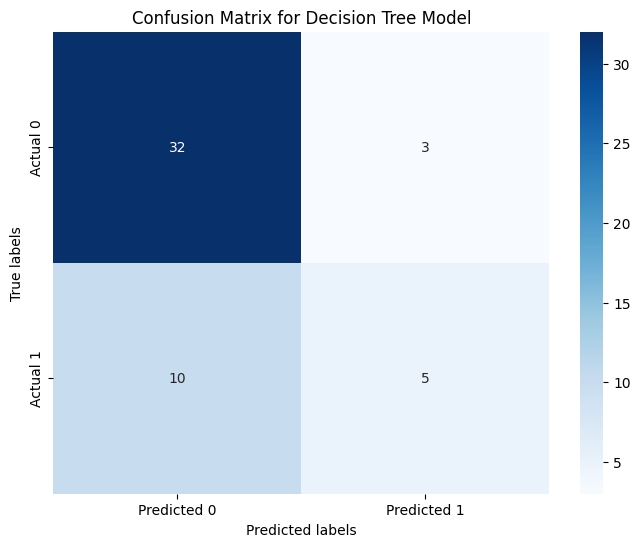

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, lr_predictions)

# Creating a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()


In [15]:
data_uji = [
    [0, 0, 1, 0, 0, 0, 0, 1],
    [0, 1, 1, 1, 1, 1, 1, 1]
]

# Membuat DataFrame dari baris data uji
columns=[
    '"Children are safe among family members such as grandparents, uncles, aunts, cousins"',
    '"Children are mainly abused by strangers in our society"',
    "Male children dont need sexual abuse prevention knowledge",
    '"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"',
    "Do you know what child grooming is?",
    "Do you know what signs to look for to identify if your child has been abused?",
    "Do you think children need post abuse counseling for recovering?",
    "Do you think you should take legal action against the abuser of your child?",
]

# Membuat DataFrame dari data uji
df_uji = pd.DataFrame(data_uji, columns=columns)

# Menampilkan DataFrame data uji
df_uji
# Menampilkan DataFrame data uji
df_uji

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?
0,0,0,1,0,0,0,0,1
1,0,1,1,1,1,1,1,1


In [16]:
prediction = lr_model.predict(df_uji)
prediction

array([0, 1])

In [17]:
def map_to_category(value):
    return "Beginner" if value == 0 else "Advanced"

# Membuat DataFrame dari hasil prediksi
df_predictions = pd.DataFrame(prediction, columns=['Predictions'])

# Membuat kolom baru 'Knowledge Level' berdasarkan hasil pemetaan nilai prediksi
df_predictions['Knowledge Level'] = df_predictions['Predictions'].map(map_to_category)

# Menampilkan DataFrame hasil prediksi dengan kategori 'Knowledge Level'
df_predictions

,Predictions,Knowledge Level
0,0,Beginner
1,1,Advanced


In [18]:
import pickle
pickle.dump(lr_model, open('model.pkl','wb'))